# Imports

In [1]:
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
import collections

In [2]:
df=pd.read_csv('LinkedIn Job Data.csv')

In [3]:
df.sample(5)

,Job ID,Date,Company Name,Post,Location,Description,Level,Type,Function,Industry
188,2010591197,2020-08-01,ENGIE,Engenheira ou Engenheiro de Operação e Manuten...,Greater Salvador,Description\n\nA área de Geração Complementar ...,Entry level,Full-time,ManagementManufacturing,Renewables & EnvironmentLaw PracticeLegal Serv...
26,2162977256,2020-09-15,Empregar Talentos,ESTÁGIO EM ENGENHARIA MECÂNICA,"Betim, Minas Gerais, Brazil",Benefícios\n\nVT E ALIMENTAÇÃO NA EMPRESA.\n\n...,Entry level,Full-time,EngineeringInformation Technology,Marketing and AdvertisingStaffing and Recruiti...
363,1665136916,2019-12-28,HEATING COOLING TECNOLOGIA TÉRMICA,Assistente Administrativo - Obras - Ar condici...,"Belém, Pará, Brazil",Área e especialização profissional: Engenharia...,Entry level,Full-time,Administrative,Construction
122,1995666680,2020-08-17,ENGIE Brasil,Analista de produtos,"São Paulo, São Paulo, Brazil",Direct message the job poster from ENGIE Brasi...,Mid-Senior level,Full-time,Business DevelopmentSalesProduct Management,Renewables & Environment
576,2008431859,2020-08-08,JONHIS INSTRUMENTOS DE MEDICAO LTDA,Supervisor De Produção Industrial,"São Paulo, São Paulo, Brazil",Vaga de Supervisor De Produção Industrial em S...,Mid-Senior level,Full-time,ManagementManufacturing,Staffing and RecruitingHuman ResourcesFaciliti...


# Análise exploratória de dados

## Location

In [4]:
df3=pd.DataFrame()

In [5]:
def estado(location):
    lst=location.split(',')
    try: return lst[1].strip()
    except IndexError: return lst[-1].strip()

df3['Location']=df['Location'].apply(estado)

In [6]:
df3['Location']=df3['Location'].str.replace('Greater Belo Horizonte','Minas Gerais') \
.replace('Greater Sao Paulo','São Paulo').replace('Greater Salvador','Nordeste') \
.replace('Greater Curitiba','Sul').replace('Greater Manaus','Norte').replace('Greater Rio de Janeiro','Rio de Janeiro') \
.replace('Brazil','NA').replace('Brazil Metropolitan Area','NA').replace('Paraiba','Paraíba')

[Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Bahia')]

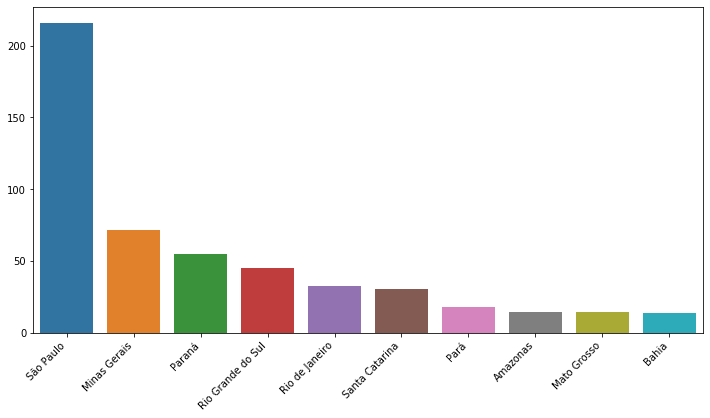

In [7]:
# 10 estados com mais vagas
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:10]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [8]:
Nordeste=['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']
Sul=['Paraná','Santa Catarina','Rio Grande do Sul']
Norte=['Amazonas','Pará','Tocantins','Rondônia','Acre','Amapá','Roraima']
Centro_Oeste=['Mato Grosso','Mato Grosso do Sul','Goiás','Distrito Federal','Federal District']
Sudeste=['Minas Gerais','Rio de Janeiro','Espírito Santo','São Paulo']

df3['Location']=df3['Location'].apply(lambda x: 'Nordeste' if x in Nordeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sul' if x in Sul else x)
df3['Location']=df3['Location'].apply(lambda x: 'Norte' if x in Norte else x)
df3['Location']=df3['Location'].apply(lambda x: 'Centro_Oeste' if x in Centro_Oeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sudeste' if x in Sudeste else x)

[Text(0, 0, 'Sudeste'),
 Text(0, 0, 'Sul'),
 Text(0, 0, 'Nordeste'),
 Text(0, 0, 'Centro_Oeste'),
 Text(0, 0, 'Norte')]

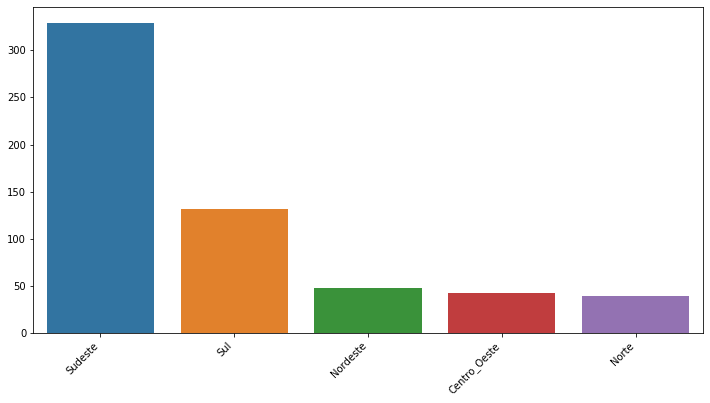

In [9]:
# Distribuição de vagas nos estados
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:5]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Function

In [10]:
df2=pd.DataFrame()

In [11]:
df2['Project Management']=df['Function'].apply(lambda x: 1 if 'Project Management' in x else 0)
df2['Engineering']=df['Function'].apply(lambda x: 1 if 'Engineering' in x else 0)
df2['Information Technology']=df['Function'].apply(lambda x: 1 if 'Information Technology' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if 'Management' in x else 0)
df2['Education']=df['Function'].apply(lambda x: 1 if 'Education' in x else 0)
df2['Other']=df['Function'].apply(lambda x: 1 if 'Other' in x else 0)
df2['Business Development']=df['Function'].apply(lambda x: 1 if 'Business Development' in x else 0)
df2['Sales']=df['Function'].apply(lambda x: 1 if 'Sales' in x else 0)
df2['Quality Assurance']=df['Function'].apply(lambda x: 1 if 'Quality Assurance' in x else 0)
df2['Administrative']=df['Function'].apply(lambda x: 1 if 'Administrative' in x else 0)
df2['DesignArt/Creative']=df['Function'].apply(lambda x: 1 if 'DesignArt/Creative' in x else 0)
df2['Purchasing']=df['Function'].apply(lambda x: 1 if 'Purchasing' in x else 0)
df2['Supply Chain']=df['Function'].apply(lambda x: 1 if 'Supply Chain' in x else 0)
df2['Manufacturing']=df['Function'].apply(lambda x: 1 if 'Manufacturing' in x else 0)
df2['Production']=df['Function'].apply(lambda x: 1 if 'Production' in x else 0)
df2['Research']=df['Function'].apply(lambda x: 1 if 'Research' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if (('Management' in x) and ('Project' not in x)) else 0)
df2['Analyst']=df['Function'].apply(lambda x: 1 if 'Analyst' in x else 0)

[Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Engineering'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Business Development'),
 Text(0, 0, 'Quality Assurance'),
 Text(0, 0, 'Project Management'),
 Text(0, 0, 'Administrative'),
 Text(0, 0, 'DesignArt/Creative'),
 Text(0, 0, 'Supply Chain'),
 Text(0, 0, 'Purchasing'),
 Text(0, 0, 'Production'),
 Text(0, 0, 'Analyst'),
 Text(0, 0, 'Research')]

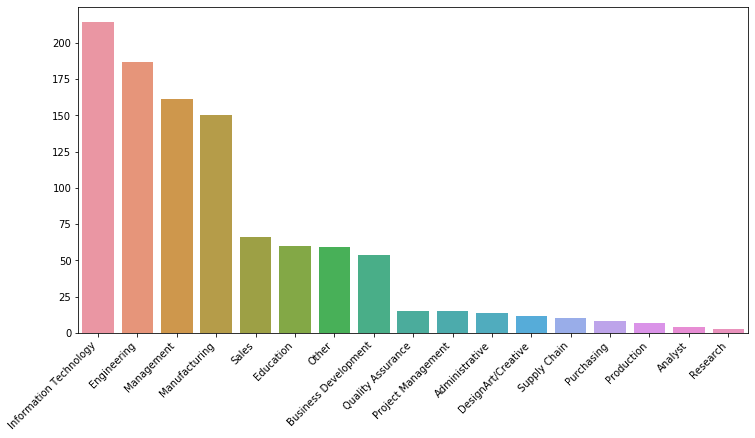

In [12]:
plt.subplots(figsize=(12,6))
aux=df2.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [13]:
# plt.subplots(figsize=(20,15))
# sns.heatmap(df.corr(),annot=True)

## Industry

In [14]:
df1=pd.DataFrame()

In [15]:
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Information Technology and Services' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Staffing and Recruiting' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Human Resources' in x else 0)

df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food & Beverages' in x else 0)
df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food Production' in x else 0)

df1['Mechanical or Industrial Engineering']=df['Industry'].apply(lambda x: True if 'Mechanical or Industrial Engineering' in x else 0)

df1['Management Consulting']=df['Industry'].apply(lambda x: True if 'Management Consulting' in x else 0)

df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Civil Engineering' in x else 0)
df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Construction' in x else 0)

df1['Industrial Automation']=df['Industry'].apply(lambda x: True if 'Industrial Automation' in x else 0)
df1['Electrical/Electronic Manufacturing']=df['Industry'].apply(lambda x: True if 'Electrical/Electronic Manufacturing' in x else 0)
df1['Mining & Metals']=df['Industry'].apply(lambda x: True if 'Mining & Metals' in x else 0)
df1['Automotive']=df['Industry'].apply(lambda x: True if 'Automotive' in x else 0)
df1['Airlines/AviationAviation & Aerospace']=df['Industry'].apply(lambda x: True if 'Airlines/AviationAviation & Aerospace' in x else 0)
df1['Paper & Forest Products']=df['Industry'].apply(lambda x: True if 'Paper & Forest Products' in x else 0)
df1['Renewables & Environment']=df['Industry'].apply(lambda x: True if 'Renewables & Environment' in x else 0)
df1['Oil & Energy']=df['Industry'].apply(lambda x: True if 'Oil & Energy' in x else 0)


[Text(0, 0, 'Staffing and Recruiting'),
 Text(0, 0, 'Mechanical or Industrial Engineering'),
 Text(0, 0, 'Electrical/Electronic Manufacturing'),
 Text(0, 0, 'Civil Engineering'),
 Text(0, 0, 'Management Consulting'),
 Text(0, 0, 'Industrial Automation'),
 Text(0, 0, 'Renewables & Environment'),
 Text(0, 0, 'Food Production'),
 Text(0, 0, 'Oil & Energy'),
 Text(0, 0, 'Automotive'),
 Text(0, 0, 'Mining & Metals'),
 Text(0, 0, 'Paper & Forest Products'),
 Text(0, 0, 'Airlines/AviationAviation & Aerospace')]

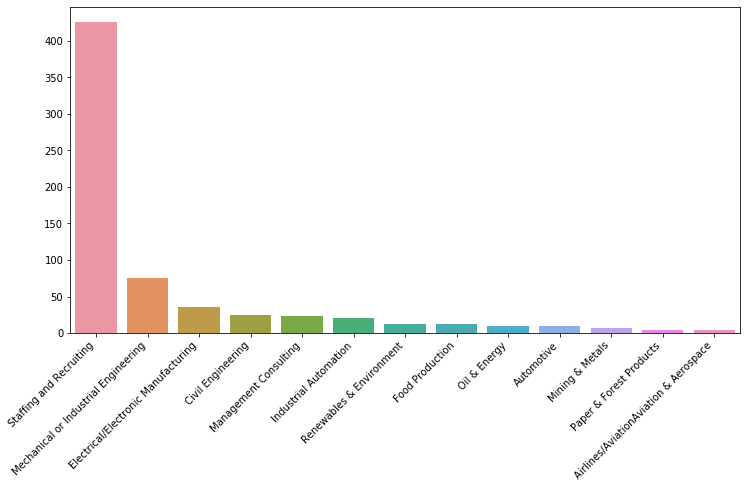

In [16]:
plt.subplots(figsize=(12,6))
aux=df1.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Description

In [17]:
df['description_length'] = df['Description'].apply(len)

In [18]:
df['description_length'].describe()

count     601.000000
mean     1259.336106
std       979.257840
min        72.000000
25%       589.000000
50%       931.000000
75%      1691.000000
max      7173.000000
Name: description_length, dtype: float64

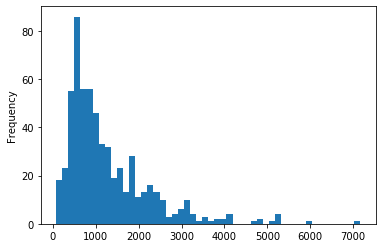

In [19]:
# Distribuição do número de caracteres da descrição da vaga
df['description_length'].plot(bins=50, kind='hist') 

In [20]:
import string

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

substituir - / por espaço
tirar pontuação, incluindo parenteses
tirar (a)

In [22]:
stopwords = open('stopwords_pt.txt', encoding='utf-8-sig', mode='r').read()

In [23]:
stopwords=stopwords.split('\n')

In [24]:
stopwords.extend(['show','less','and','the','–','eou','você','será'])

In [25]:
stopwords[-10:] ##show some stopwords

['és', 'último', 'show', 'less', 'and', 'the', '–', 'eou', 'você', 'será']

In [26]:
df.columns

Index(['Job ID', 'Date', 'Company Name', 'Post', 'Location', 'Description',
       'Level', 'Type', 'Function', 'Industry', 'description_length'],
      dtype='object')

In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    norm = [char for char in mess if char not in string.punctuation]
    # tirar acentos
    norm = [char.replace('á','a').replace('é','e').replace('ã','a').replace('í','i').replace('ó','o').replace('ú','u').replace('ç','c')\
           .replace('ê','e').replace('â','a').replace('õ','o').replace('ô','o') for char in norm]
    # Join the characters again to form the string.
    norm = ''.join(norm)
    
    # Put chars in lower case
    norm = norm.lower()
    
    # Now just remove any stopwords
    return [word for word in norm.split() if word.lower() not in stopwords]

In [28]:
Desc=df['Description'].apply(text_process)

In [29]:
Desc

0      [ira, manter, atualizado, cronograma, planejam...
1      [admite, sede, belo, horizonteminas, gerais, g...
2      [atencao, necessario, anexar, curriculo, ato, ...
3      [formacao, superior, completo, engenharia, ele...
4      [titulogerente, seguranca, belo, horizonte, mg...
                             ...                        
596    [realizara, atividades, integridade, tanque, d...
597    [descricao, codigo, 776109, funcao, projetista...
598    [vaga, tecnico, eletronico, sao, paulo, combin...
599    [cursando, engenharia, producao, eletrica, mec...
600    [workcell, rh, 1, vagas, aberto, cidade, indai...
Name: Description, Length: 601, dtype: object

In [30]:
lst=[element for list_ in Desc for element in list_]

In [31]:
words=pd.DataFrame({'Number': lst}) 

In [32]:
top=pd.DataFrame()

In [33]:
for i in range(0,6):
    lim=30
    top=pd.concat([top,pd.DataFrame(words['Number'].value_counts()[(i*lim):(i*lim+lim)]).reset_index()],axis=1)

In [34]:
top

,index,Number,index,Number,index,Number,index,Number,index,Number,index,Number
0,engenharia,1160,profissional,194,elaborar,148,automacao,108,civil,87,preventiva,77
1,mecanica,744,analise,192,execucao,147,saude,108,planos,86,programa,77
2,manutencao,701,elaboracao,189,cursando,146,humanos,108,diferencial,86,energia,75
3,experiencia,596,servicos,189,atraves,145,melhorias,108,1,85,hierarquico,75
4,projetos,578,processo,180,tecnica,142,ramo,107,informacoes,85,oportunidades,75
5,producao,477,voce,178,vale,141,transporte,106,pecas,85,montagem,74
6,conhecimento,451,clientes,178,industrial,140,procedimentos,106,administracao,85,autocad,74
7,empresa,430,office,176,acompanhar,139,operacao,105,refeicao,85,problemas,74
8,gestao,424,areas,174,mecatronica,138,auxiliar,102,participar,85,brasil,73
9,equipamentos,419,combinar,174,relatorios,136,solucoes,102,time,84,mecanicos,72


In [35]:
text=' '.join(lst)

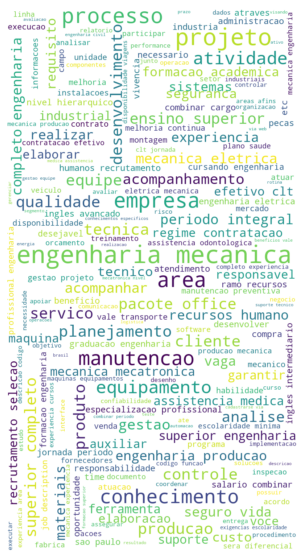

In [36]:
wc= WordCloud(background_color="white", random_state=1, max_words = 200, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
test=pd.DataFrame(words['Number'].value_counts()).reset_index()

In [38]:
test

,index,Number
0,engenharia,1160
1,mecanica,744
2,manutencao,701
3,experiencia,596
4,projetos,578
...,...,...
8099,alugadas,1
8100,ec,1
8101,factivel,1
8102,distintos,1


In [39]:
test[test['index']=='salario']

,index,Number
54,salario,153


In [40]:
# words_list = "apple banana banana apple orange".split()
# word_pair_list = zip(words_list[:-1], words_list[1:])
# word_pair_ctr = collections.Counter(word_pair_list)
# word_pair_ctr

In [41]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('pt_core_news_sm')

In [42]:
# Create a Doc object
doc = nlp(df['Description'][3])

# Print each token separately
for token in doc:
    print(token.text, token.pos_)

Formação NOUN
: PUNCT
  SPACE
Superior PROPN
completo ADJ
em ADP
Engenharia PROPN
Elétrica PROPN
, PUNCT
Mecânica PROPN
, PUNCT
Civil PROPN
ou CCONJ
outras DET
áreas NOUN
. PUNCT

 SPACE
Localidade NOUN
: PUNCT
Região NOUN
de ADP
Belo PROPN
Horizonte PROPN
/ PUNCT
Minas PROPN
Gerais PROPN
. PUNCT

 SPACE
Horário PROPN
de ADP
Trabalho PROPN
: PUNCT
Administrativo PROPN
. PUNCT


 SPACE
Pré PROPN
requisitos NOUN
obrigatórios ADJ
: PUNCT

 SPACE
Experiência NOUN
ampla ADJ
com ADP
as DET
rotinas NOUN
de ADP
planejamento NOUN
de ADP
projetos NOUN
. PUNCT

 SPACE
Bons ADJ
conhecimentos NOUN
técnicos ADJ
em ADP
planejamento NOUN
. PUNCT

 SPACE
Obrigatório ADJ
conhecimento NOUN
avançado VERB
ou CCONJ
fluente ADJ
no DET
idioma NOUN
inglês ADJ
. PUNCT

 SPACE
Necessário ADJ
ter VERB
atuação NOUN
com ADP
a DET
ferramenta ADJ
Primavera NOUN
, PUNCT
MS PROPN
Project PROPN
ou CCONJ
similares ADJ
. PUNCT

 SPACE
Pacote PROPN
Office PROPN
intermediário ADJ
. PUNCT


 SPACE
Atividades NOUN
e CCONJ
res

In [43]:
doc[11].lemma_

'Civil'

In [44]:
len(doc.vocab)

292

In [45]:
for ent in doc.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Superior - LOC - Non-GPE locations, mountain ranges, bodies of water
Engenharia Elétrica, Mecânica - ORG - Companies, agencies, institutions, etc.
Civil - LOC - Non-GPE locations, mountain ranges, bodies of water
Localidade - LOC - Non-GPE locations, mountain ranges, bodies of water
Região de Belo Horizonte - LOC - Non-GPE locations, mountain ranges, bodies of water
Minas Gerais - LOC - Non-GPE locations, mountain ranges, bodies of water
Horário de Trabalho: Administrativo - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Experiência - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Bons - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Obrigatório - PER - Named person or family.
Primavera - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
MS Project - PER - Named person or family.
Pacote Office - MISC - Miscellaneous entities, e.g. events, nati

In [46]:
# doc = nlp('carros mais caros não valem mais.')
# for chunk in doc.noun_chunks:
#     print(chunk.text)

In [47]:
for token in doc:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

Formação 	 NOUN 	 15123089542656408183 	 Formação
: 	 PUNCT 	 11532473245541075862 	 :
  	 SPACE 	 8532415787641010193 	  
Superior 	 PROPN 	 2557851012177304347 	 Superior
completo 	 ADJ 	 15042977213532169196 	 completar
em 	 ADP 	 4478690315169353386 	 em
Engenharia 	 PROPN 	 17771089565655397818 	 Engenharia
Elétrica 	 PROPN 	 4651794924624558388 	 Elétrica
, 	 PUNCT 	 2593208677638477497 	 ,
Mecânica 	 PROPN 	 15082944612033648072 	 Mecânica
, 	 PUNCT 	 2593208677638477497 	 ,
Civil 	 PROPN 	 2467221972047851574 	 Civil
ou 	 CCONJ 	 7904677917145870628 	 ou
outras 	 DET 	 1908679283288008491 	 outro
áreas 	 NOUN 	 4810416537185791108 	 área
. 	 PUNCT 	 12646065887601541794 	 .

 	 SPACE 	 962983613142996970 	 

Localidade 	 NOUN 	 8710028955204789009 	 Localidade
: 	 PUNCT 	 11532473245541075862 	 :
Região 	 NOUN 	 3162771637759176192 	 Região
de 	 ADP 	 11144093025662894627 	 de
Belo 	 PROPN 	 8756349092843369845 	 Belo
Horizonte 	 PROPN 	 10404466369148261211 	 Horizonte
/ 	 PUN

In [48]:
print(nlp.Defaults.stop_words)

{'nesta', 'estes', 'esta', 'sois', 'fazes', 'porquê', 'bastante', 'umas', 'muitos', 'novos', 'dizer', 'nível', 'logo', 'terceira', 'põem', 'ali', 'depois', 'oitavo', 'bem', 'vinda', 'contudo', 'numa', 'três', 'outra', 'estiveram', 'breve', 'ontem', 'próprio', 'nova', 'antes', 'partir', 'foram', 'vos', 'outros', 'tenho', 'parece', 'neste', 'obrigado', 'esse', 'meses', 'ambas', 'suas', 'relação', 'estar', 'na', 'aquelas', 'entre', 'uns', 'diante', 'nosso', 'puderam', 'foi', 'porquanto', 'saber', 'podia', 'tuas', 'des', 'povo', 'quando', 'lado', 'nas', 'além', 'tão', 'essas', 'nessa', 'forma', 'às', 'pois', 'fazeis', 'meio', 'então', 'dos', 'vossas', 'tais', 'dezanove', 'os', 'nossa', 'vosso', 'tiveste', 'onze', 'certeza', 'toda', 'te', 'falta', 'todo', 'fostes', 'sétima', 'vêm', 'ainda', 'quatro', 'nesse', 'era', 'temos', 'já', 'dizem', 'fomos', 'pelo', 'vocês', 'fui', 'acerca', 'nada', 'tente', 'aqui', 'alguns', 'estão', 'sexto', 'conselho', 'apontar', 'segundo', 'estive', 'debaixo', 'd

In [49]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [63]:
doc = nlp(df['Description'][100])

In [64]:
print(doc)

Atenção: é necessário anexar seu currículo no ato da inscrição.

A triagem para o processo seletivo é realizada através da leitura do seu currículo anexado, caso já esteja anexado, lembre-se de manter o arquivo atualizado. Manter o currículo atualizado aumenta as suas chances de sucesso no processo seletivo.

N° de Vagas: 2

Formação: Engenharia Mecânica, Eletromecânica ou Produção

Localidade: Concentração Magnética – Carajás – Pará

Período de inscrição: de 15/09/2020 a 21/09/2020

Pré-requisitos Obrigatórios
Experiência em circuito mineroduto, sistemas de tubulações de barragem. Captação de água de barragem;
Experiência com separação magnética, filtragem, discos e espessadores;
Conhecimentos em técnicas de inspeção preditiva;
Domínio em Power BI;
Conhecimento em metodologias de análise de falhas (SWOT, FMEA, Lean Manufacture, VPS, Sistema Toyota de Produção)

Atividades e Responsabilidades
Desenvolver e coordenar projetos de VPS (LEAN – Pensamento Enxuto);
Conectar os indicadores de

In [65]:
show_ents(doc)

Vagas - LOC - Non-GPE locations, mountain ranges, bodies of water
Eletromecânica - LOC - Non-GPE locations, mountain ranges, bodies of water
Produção

 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Carajás - LOC - Non-GPE locations, mountain ranges, bodies of water
Pará - LOC - Non-GPE locations, mountain ranges, bodies of water
Experiência - LOC - Non-GPE locations, mountain ranges, bodies of water
Conhecimentos - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Domínio - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Power BI - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Conhecimento - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
SWOT - PER - Named person or family.
FMEA - PER - Named person or family.
Lean Manufacture - PER - Named person or family.
VPS - ORG - Companies, agencies, institutions,